In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [3]:
import pandas as pd
import numpy as np
from glob import glob
from os.path import join

import seaborn as sns
from tqdm import tqdm

from matplotlib.colors import LogNorm
import strawb

from strawb.tools import wavelength_to_rgb


In [14]:
import seaborn as sns
matplotlib = sns.mpl
plt = matplotlib.pyplot
sns.set(
    context="notebook",
    style="ticks",
    font="serif",
    font_scale=1.5,
    rc={
        "font.family": "serif",
        "axes.grid": True,
        "grid.color": "0.9",
        "mathtext.fontset": "cm",
        "image.cmap": "mako",
        "savefig.format": "pdf",
        "savefig.dpi": 200,
        "savefig.transparent": False,
        "axes.facecolor": "white",
    },
)
sns.set_palette("mako")

# Setup

In [4]:
# load DB
db = strawb.SyncDBHandler(file_name="Default")  # loads the db


In [5]:
### these are the available device codes
print(db.dataframe.deviceCode.unique())

### different measurement types for PMTSPEC and LIDAR
print(db.dataframe.measurement_type.unique())


['ONCMJB016' 'TUMLIDAR001' 'TUMLIDAR002' 'TUMMINISPECTROMETER001'
 'TUMMUONTRACKER001' 'TUMPMTSPECTROMETER001' 'TUMPMTSPECTROMETER002'
 'TUMSTANDARDMODULE001' 'TUMSTANDARDMODULE004']
[nan 'counts' 'rate_scan' 'basic']


## select time range

In [6]:
mask = db.dataframe["deviceCode"] == "TUMPMTSPECTROMETER001"
mask &= db.dataframe["dataProductCode"] == "PMTSD"

timestamp = np.datetime64("2021-09-01T00:00:00")
mask &= db.dataframe.dateFrom >= pd.Timestamp(np.datetime64(timestamp, "h"), tz="UTC")
mask &= db.dataframe.dateFrom < pd.Timestamp(
    np.datetime64(timestamp, "h"), tz="UTC"
) + np.timedelta64(5, "D")


In [7]:
db.dataframe["file_ok"] = "None"

In [8]:
### see which files are synced
np.count_nonzero(db.dataframe[mask].synced), len(db.dataframe[mask])


(130, 130)

## download missing files

In [ ]:
### this will download the selected files
if not db.dataframe.synced[mask].all():
    db.update_db_and_load_files(
        db.dataframe[mask],
        output=True,  # print output to console
        download=True,  # download the files
        # save_db=True
    )
    db.save_db()


  In total: 130 files; skips synced: 27; size to download: 2.58 GB, from deviceCode: ['TUMPMTSPECTROMETER001']

-> Download the files from the ONC server
100%|██████████| 103/103 [21:14<00:00, 12.37s/file, i=TUMPMTSPECTROMETER001_20210905T230000.000Z-SDAQ-PMTSPEC.hdf5]
Downloaded - Directory: /data/straw_b/raw_module_data; Files: 103; Size: 2.8 GB; Time: 21 minutes; Speed: 2.2 MB/s

-> Update hdf5 attributes
100%|██████████| 103/103 [00:00<00:00, 288.05files/s, i=115]

-> Add to db


In [9]:
# mask by device
mask = db.dataframe["deviceCode"] == "TUMPMTSPECTROMETER001"
mask &= db.dataframe["dataProductCode"] == "PMTSD"

# and add mask by 'measurement_type'
mask &= db.dataframe.measurement_type.isnull() | (
    db.dataframe.measurement_type == "counts"
)
mask &= db.dataframe["synced"]

db.dataframe[mask].head()  # plot the table with available PMTSPEC files


,archiveLocation,archivedDate,compression,dataProductCode,dateFrom,dateTo,deviceCode,fileSize,filename,modifyDate,...,name,previous_file_id,rollover_interval,run_end,run_start,write_period,measurement_type,measurement_duration,write_period_jitter,file_ok
fullPath,,,,,,,,,,,,,,,,,,,,,
/data/straw_b/raw_module_data/tumpmtspectrometer001/2021_09/TUMPMTSPECTROMETER001_20210901T000000.000Z-SDAQ-PMTSPEC.hdf5,/NA_Archive_04,2021-09-01 02:09:41.650000+00:00,None,PMTSD,2021-09-01 00:00:00+00:00,2021-09-01 00:59:59.999000+00:00,TUMPMTSPECTROMETER001,31861355,TUMPMTSPECTROMETER001_20210901T000000.000Z-SDA...,2021-09-01 02:09:43.402000+00:00,...,PMTSPEC,3.622651e+18,{'hours': 1},NaT,2021-08-31 03:08:04.986227036+00:00,60.0,counts,NaN,NaN,None
/data/straw_b/raw_module_data/tumpmtspectrometer001/2021_09/TUMPMTSPECTROMETER001_20210901T010000.000Z-SDAQ-PMTSPEC.hdf5,/NA_Archive_04,2021-09-02 01:50:13.216000+00:00,None,PMTSD,2021-09-01 01:00:00+00:00,2021-09-01 01:59:59.999000+00:00,TUMPMTSPECTROMETER001,17324748,TUMPMTSPECTROMETER001_20210901T010000.000Z-SDA...,2021-09-02 01:50:13.720000+00:00,...,PMTSPEC,1.508277e+19,{'hours': 1},NaT,2021-08-31 03:08:04.986227036+00:00,60.0,counts,NaN,NaN,None
/data/straw_b/raw_module_data/tumpmtspectrometer001/2021_09/TUMPMTSPECTROMETER001_20210901T020000.000Z-SDAQ-PMTSPEC.hdf5,/NA_Archive_04,2021-09-02 01:50:16.651000+00:00,None,PMTSD,2021-09-01 02:00:00+00:00,2021-09-01 02:59:59.999000+00:00,TUMPMTSPECTROMETER001,46204,TUMPMTSPECTROMETER001_20210901T020000.000Z-SDA...,2021-09-02 01:50:16.678000+00:00,...,PMTSPEC,1.705897e+19,{'hours': 1},NaT,2021-08-31 03:08:04.986227036+00:00,60.0,counts,NaN,NaN,None
/data/straw_b/raw_module_data/tumpmtspectrometer001/2021_09/TUMPMTSPECTROMETER001_20210901T030000.000Z-SDAQ-PMTSPEC.hdf5,/NA_Archive_04,2021-09-02 01:50:32.796000+00:00,None,PMTSD,2021-09-01 03:00:00+00:00,2021-09-01 03:01:00.243000+00:00,TUMPMTSPECTROMETER001,39994,TUMPMTSPECTROMETER001_20210901T030000.000Z-SDA...,2021-09-02 01:50:32.815000+00:00,...,PMTSPEC,1.411401e+19,{'hours': 1},NaT,2021-08-31 03:08:04.986227036+00:00,60.0,counts,NaN,NaN,None
/data/straw_b/raw_module_data/tumpmtspectrometer001/2021_09/TUMPMTSPECTROMETER001_20210901T030758.986Z-SDAQ-PMTSPEC.hdf5,/NA_Archive_04,2021-09-02 01:50:34.810000+00:00,None,PMTSD,2021-09-01 03:07:58.986000+00:00,2021-09-01 03:59:59.999000+00:00,TUMPMTSPECTROMETER001,26586245,TUMPMTSPECTROMETER001_20210901T030758.986Z-SDA...,2021-09-02 01:50:35.488000+00:00,...,PMTSPEC,0.000000e+00,{'hours': 1},NaT,2021-09-01 03:07:58.987215042+00:00,60.0,counts,NaN,NaN,None


# Rate counting

In [10]:
good_trb_series = []
# select file with the right data
mask = db.dataframe.deviceCode == "TUMPMTSPECTROMETER001"
mask &= db.dataframe.dataProductCode == "PMTSD"
mask &= db.dataframe.measurement_type.isnull() | (
    db.dataframe.measurement_type == "counts"
)
# only synced data
mask &= db.dataframe.synced
# load PMTSpec
for i, row in db.dataframe[mask].iterrows():
    try:
        ## get the PMT data and its meta data (channel no. etc)
        pmt_specs_timeseries = strawb.sensors.PMTSpec(row.filename)
        meta = pmt_specs_timeseries.pmt_meta_data.channel_meta_array

        ## select the channel with no wavelength filter
        no_filter_ind = meta[meta["wavelength"] == 0]["index"][0]
        selection = pmt_specs_timeseries.trb_rates.rate[no_filter_ind]

    except KeyError:
        # corrupt file
        print("Corrupt file:", row.filename)
        db.dataframe.loc[i, "file_ok"] = "corrupt"
        continue
    except TypeError as e:
        # empty file
        print("Empty file:", row.filename)
        db.dataframe.loc[i, "file_ok"] = "empty"
        continue
    
    ## build a histogram of the rate series
    bins = np.linspace(1, 8, 100)
    h, ed = np.histogram(np.log10(selection[selection > 0]), bins=bins)
    ## ... and a histogram weighted with the size of the time intervals
    hw, _ = np.histogram(
        np.log10(selection[selection > 0]),
        bins=bins,
        weights=pmt_specs_timeseries.trb_rates._rate_delta_t[selection > 0],
    )
    good_trb_series.append(
        {
            "rate_hist": h,
            "weighted_rate_hist": hw,
            "rate_bins": ed,
            "zero_counts": np.count_nonzero(selection == 0),
            "timestamp": row.dateFrom,
        }
    )
    db.dataframe.loc[i, "file_ok"] = "ok"
good_trb_series = pd.DataFrame(good_trb_series)
db.save_db()

Corrupt file: TUMPMTSPECTROMETER001_20210901T020000.000Z-SDAQ-PMTSPEC.hdf5
Corrupt file: TUMPMTSPECTROMETER001_20210901T030000.000Z-SDAQ-PMTSPEC.hdf5
Corrupt file: TUMPMTSPECTROMETER001_20210926T030000.000Z-SDAQ-PMTSPEC.hdf5


In [11]:
db.dataframe.file_ok.unique()

array(['None', 'ok', 'corrupt'], dtype=object)

In [12]:
db.dataframe[(db.dataframe.file_ok == "corrupt") | (db.dataframe.file_ok == "empty")].fileSize

fullPath
/data/straw_b/raw_module_data/tumpmtspectrometer001/2021_09/TUMPMTSPECTROMETER001_20210901T020000.000Z-SDAQ-PMTSPEC.hdf5    46204
/data/straw_b/raw_module_data/tumpmtspectrometer001/2021_09/TUMPMTSPECTROMETER001_20210901T030000.000Z-SDAQ-PMTSPEC.hdf5    39994
/data/straw_b/raw_module_data/tumpmtspectrometer001/2021_09/TUMPMTSPECTROMETER001_20210926T030000.000Z-SDAQ-PMTSPEC.hdf5    39999
Name: fileSize, dtype: int64

Text(0.5, 1.0, '2021-09-01 00:00:00+00:00 - 2021-09-26 03:08:14.505000+00:00')

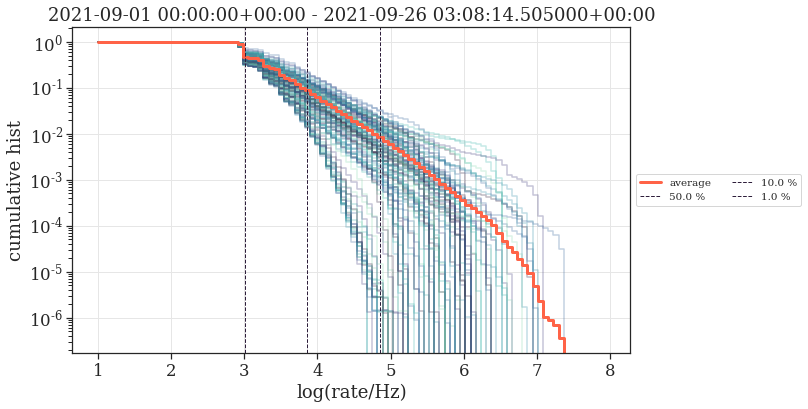

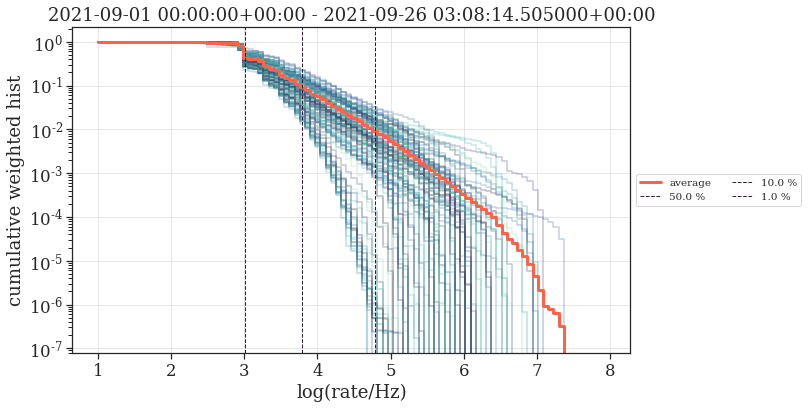

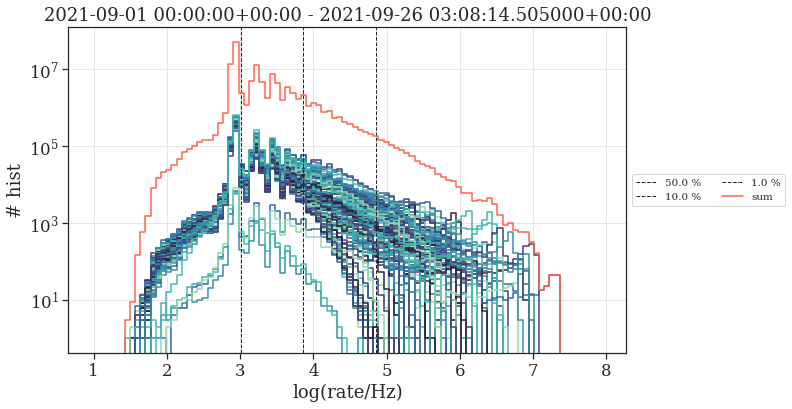

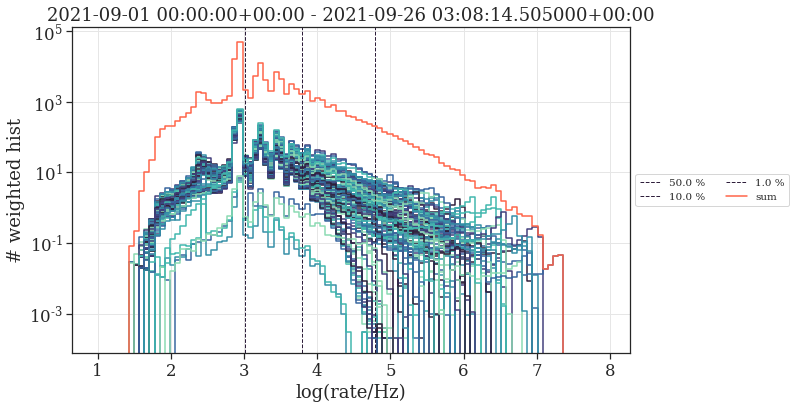

In [15]:
plt.figure(1, figsize=(10, 6))
plt.figure(2, figsize=(10, 6))
plt.figure(3, figsize=(10, 6))
plt.figure(4, figsize=(10, 6))

for _, trb in good_trb_series.iterrows():
    plt.figure(1)
    cs = np.cumsum(trb.rate_hist[::-1]).astype(float)
    cs /= cs[-1]
    p = plt.plot(trb.rate_bins[:-1], cs[::-1], ds="steps-pre", 
    #, label=trb.timestamp)
    alpha=0.3) 

    plt.figure(2)
    cs = np.cumsum(trb.weighted_rate_hist[::-1]).astype(float)
    cs /= cs[-1]
    p = plt.plot(trb.rate_bins[:-1], cs[::-1], ds="steps-pre", 
    #, label=trb.timestamp)
    alpha=0.3) 

    plt.figure(3)
    plt.plot(
        trb.rate_bins[:-1],
        trb.rate_hist,
        #label=timestamp,
        color=p[0].get_color(),
        ds="steps",
    )
    #plt.scatter(-0.5 + 0.1 * _, trb.zero_counts, color=p[0].get_color())

    plt.figure(4)
    plt.plot(
        trb.rate_bins[:-1],
        trb.weighted_rate_hist,
        #label=timestamp,
        color=p[0].get_color(),
        ds="steps",
    )
    #plt.scatter(-0.5 + 0.1 * _, trb.zero_counts, color=p[0].get_color())

rate_sum = good_trb_series.rate_hist.sum()
weighted_rate_sum = good_trb_series.weighted_rate_hist.sum()

plt.figure(1)
cs = np.cumsum(rate_sum[::-1]).astype(float)
cs /= cs[-1]
p = plt.plot(
    trb.rate_bins[:-1], cs[::-1], ds="steps-pre", label="average", color="tomato", lw=3
)


plt.figure(2)
wcs = np.cumsum(weighted_rate_sum[::-1]).astype(float)
wcs /= wcs[-1]
p = plt.plot(
    trb.rate_bins[:-1], wcs[::-1], ds="steps-pre", label="average", color="tomato", lw=3
)

quantiles = [0.5, 0.1, 0.01]
for q in quantiles:
    mids = (trb.rate_bins[:-1] + trb.rate_bins[1:]) * 0.5

    thresh = mids[cs[::-1] >= q][-1]
    plt.figure(1)
    plt.axvline(thresh, label=f"{q*100} %", ls="--", lw=1)
    plt.figure(3)
    plt.axvline(thresh, label=f"{q*100} %", ls="--", lw=1)

    thresh = mids[wcs[::-1] >= q][-1]
    plt.figure(2)
    plt.axvline(thresh, label=f"{q*100} %", ls="--", lw=1)
    plt.figure(4)
    plt.axvline(thresh, label=f"{q*100} %", ls="--", lw=1)

plt.figure(3)
plt.plot(
    trb.rate_bins[:-1],
    rate_sum,
    label="sum",
    color=p[0].get_color(),
    ds="steps",
)
#plt.scatter(-0.5 + 0.1 * (_ + 1), trb.zero_counts, color="tomato")

plt.figure(4)
plt.plot(
    trb.rate_bins[:-1],
    weighted_rate_sum,
    label="sum",
    color=p[0].get_color(),
    ds="steps",
)
# plt.scatter(-0.5 + 0.1 * (_ + 1), trb.zero_counts, color="tomato")


plt.figure(1)
plt.ylabel("cumulative hist")
plt.xlabel("log(rate/Hz)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize="xx-small", ncol=2)
plt.semilogy()
plt.title(f"{good_trb_series.timestamp.min()} - {good_trb_series.timestamp.max()}")

plt.figure(2)
plt.ylabel("cumulative weighted hist")
plt.xlabel("log(rate/Hz)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize="xx-small", ncol=2)
plt.semilogy()
plt.title(f"{good_trb_series.timestamp.min()} - {good_trb_series.timestamp.max()}")

plt.figure(3)
plt.ylabel("# hist")
plt.xlabel("log(rate/Hz)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize="xx-small", ncol=2)
plt.semilogy()
plt.title(f"{good_trb_series.timestamp.min()} - {good_trb_series.timestamp.max()}")

plt.figure(4)
plt.ylabel("# weighted hist")
plt.xlabel("log(rate/Hz)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize="xx-small", ncol=2)
plt.semilogy()
plt.title(f"{good_trb_series.timestamp.min()} - {good_trb_series.timestamp.max()}")


# Analyze specific events

In [16]:
selected_timestamps = [
    np.datetime64("2021-09-04T23:44:09"),
    np.datetime64("2021-09-14T12:11:46"),
    np.datetime64("2021-09-26T03:14:35"),
]


In [17]:
for timestamp in selected_timestamps:
    mask = db.dataframe["deviceCode"] == "TUMPMTSPECTROMETER001"
    mask &= db.dataframe["dataProductCode"] == "PMTSD"
    ## select 1h frame around the selected timestamps
    mask &= db.dataframe.dateFrom >= pd.Timestamp(
        np.datetime64(timestamp, "h"), tz="UTC"
    )
    mask &= db.dataframe.dateFrom < (pd.Timestamp(
        np.datetime64(timestamp, "h"), tz="UTC"
    ) + np.timedelta64(1, "h"))
    if not db.dataframe.synced[mask].all():
        db.update_db_and_load_files(
            db.dataframe[mask],
            output=True,  # print output to console
            download=True,  # download the files
            # save_db=True
        )
        db.save_db()


In [18]:
pmt_specs = []
for timestamp in selected_timestamps:
    # select file with the right data
    mask = db.dataframe.deviceCode == "TUMPMTSPECTROMETER001"
    mask &= db.dataframe.dataProductCode == "PMTSD"
    mask &= db.dataframe.measurement_type.isnull() | (
        db.dataframe.measurement_type == "counts"
    )
    # only synced data
    mask &= db.dataframe.synced

    ## select 1h frame around the biolumi event
    mask &= db.dataframe.dateFrom >= pd.Timestamp(
        np.datetime64(timestamp, "h"), tz="UTC"
    )
    mask &= db.dataframe.dateFrom < pd.Timestamp(
        np.datetime64(timestamp, "h"), tz="UTC"
    ) + np.timedelta64(1, "h")

    # load PMTSpec
    try:
        # select the latest frame that matches the condition
        pmt_specs.append(strawb.sensors.PMTSpec(db.dataframe.filename[mask].iloc[-1]))
        print("that did actually work!")
    except:
        print("that didnt work", db.dataframe.filename[mask].iloc[-1])
        continue


that did actually work!
that did actually work!
that did actually work!


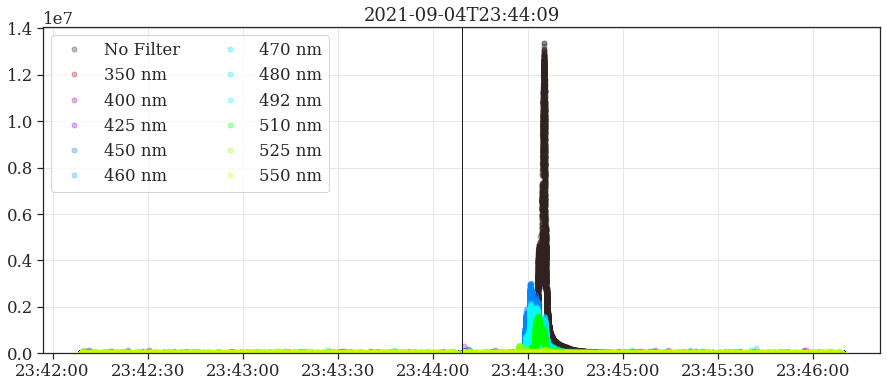

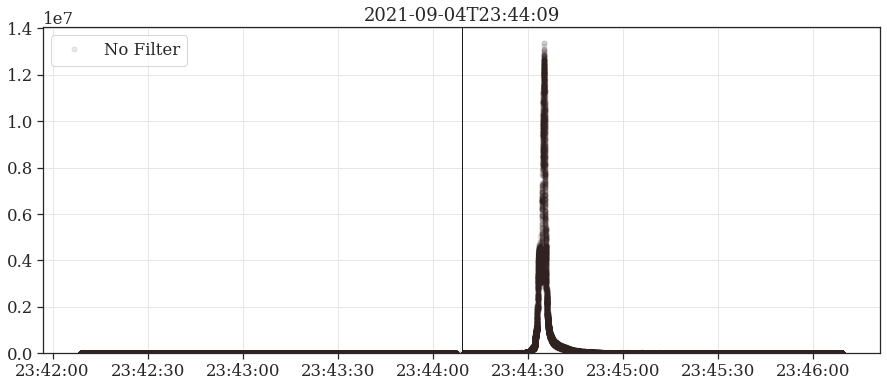

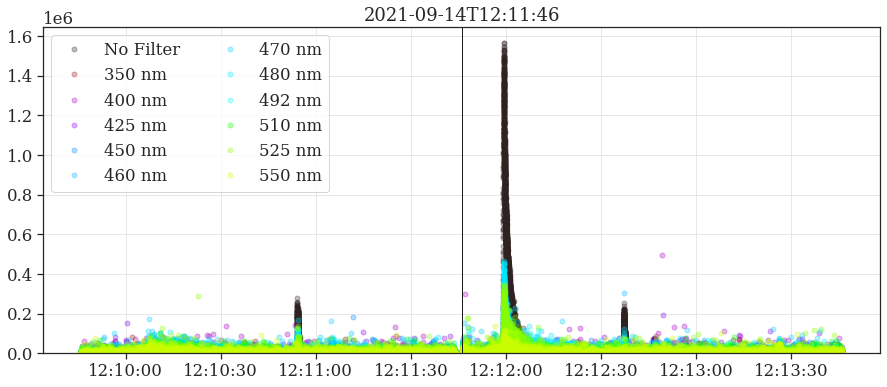

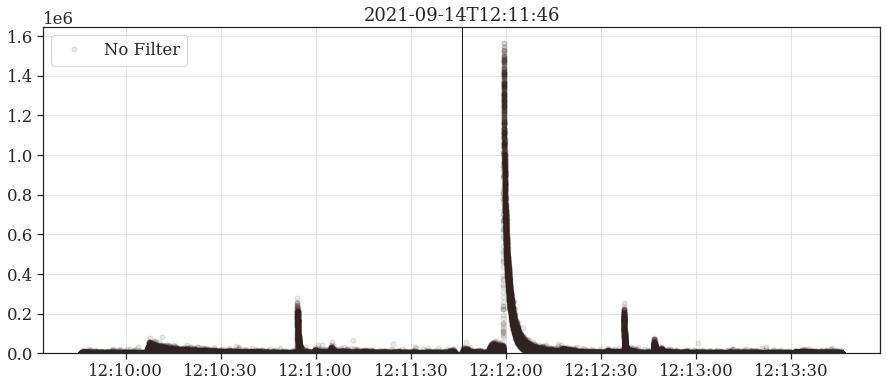

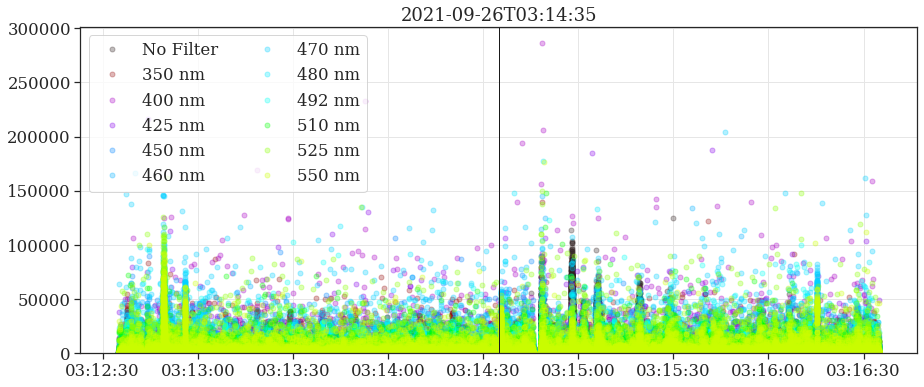

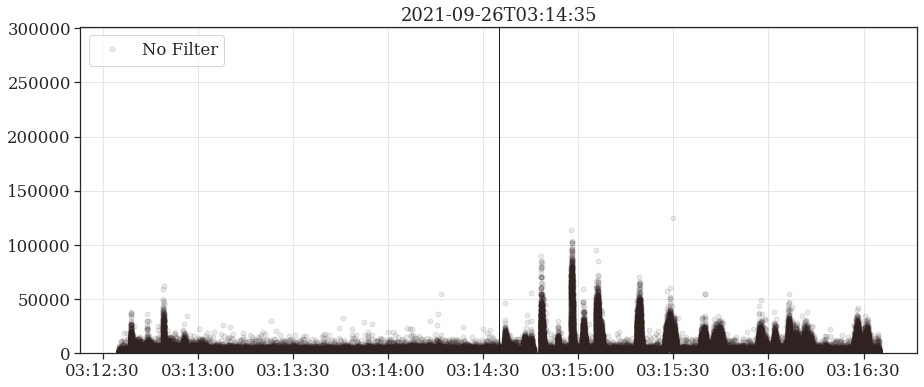

In [19]:
for pmtspec, timestamp in zip(pmt_specs, selected_timestamps):

    pmtspec.pmt_meta_data.add_colors(
        plt.cm.get_cmap("viridis"), None, sns.color_palette("dark:red", as_cmap=True)
    )

    times_ns = strawb.tools.asdatetime(pmtspec.trb_rates.time, "ns")
    ### select +-2min around biolumi events
    timemask = times_ns >= timestamp - np.timedelta64(
        2, "m"
    )  # - np.timedelta64(30, "s")
    timemask &= times_ns <= timestamp + np.timedelta64(
        2, "m"
    )  # + np.timedelta64(30, "s")
    masked_times_ns = times_ns[timemask]

    plt.figure(figsize=(15, 6))
    plt.title(timestamp)
    for ch in pmtspec.pmt_meta_data.channel_meta_array:
        _ = plt.plot(
            masked_times_ns,
            pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
            color=wavelength_to_rgb(ch, gamma=0.4),
            label=ch["label"],
            marker="o",
            lw=0,
            alpha=0.3,
            ms=5,
        )
    plt.legend(loc=2, ncol=2)
    plt.axvline(timestamp, lw=1, color="k")
    plt.ylim(0, np.max(pmtspec.trb_rates.rate.T[timemask]) * 1.05)

    plt.figure(figsize=(15, 6))
    plt.title(timestamp)
    for ch in pmtspec.pmt_meta_data.channel_meta_array[
        pmtspec.pmt_meta_data.channel_meta_array["wavelength"] == 0
    ]:
        _ = plt.plot(
            masked_times_ns,
            pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
            color=wavelength_to_rgb(ch, gamma=0.4),
            label=ch["label"],
            marker="o",
            lw=0,
            alpha=0.1,
            ms=5,
        )
    plt.legend(loc=2, ncol=2)
    plt.axvline(timestamp, lw=1, color="k")
    plt.ylim(0, np.max(pmtspec.trb_rates.rate.T[timemask]) * 1.05)

## zoom ins

In [20]:
import colorsys
from scipy.ndimage.filters import uniform_filter1d
import matplotlib.colors as mc


In [21]:
def change_color_ld(color, amount=0.2):
    """slightly change the color lightness/darkness"""
    if not colorsys:
        print("Cannot change color.")
        return color
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    c_new = np.clip(c[1] + amount, 0, 1)
    return colorsys.hls_to_rgb(c[0], c_new, c[2])


In [22]:
filter_N = 100


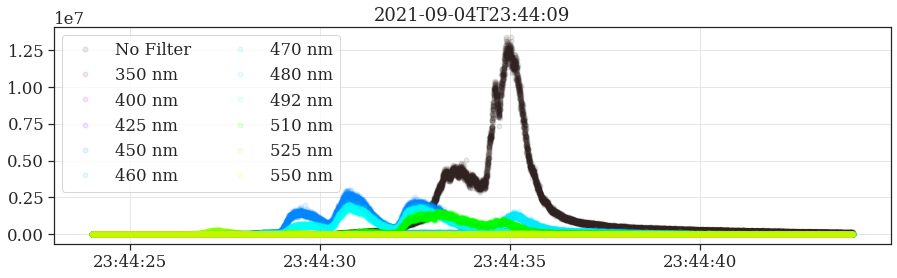

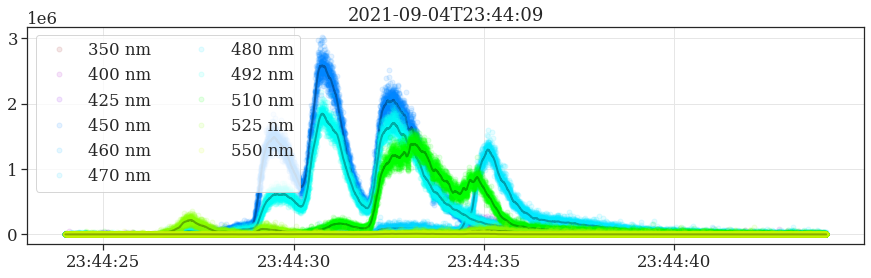

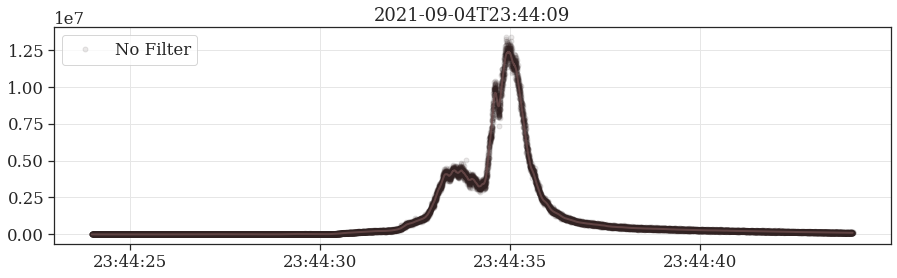

In [23]:
pmtspec, timestamp = pmt_specs[0], selected_timestamps[0]

pmtspec.pmt_meta_data.add_colors(
    plt.cm.get_cmap("viridis"), None, sns.color_palette("dark:red", as_cmap=True)
)

times_ns = strawb.tools.asdatetime(pmtspec.trb_rates.time, "ns")
### select +-2min around biolumi events
timemask = times_ns >= timestamp + np.timedelta64(15, "s")
timemask &= times_ns <= timestamp + np.timedelta64(35, "s")
masked_times_ns = times_ns[timemask]

plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
plt.legend(loc=2, ncol=2)

plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array[
    pmtspec.pmt_meta_data.channel_meta_array["wavelength"] != 0
]:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
    plt.plot(
        masked_times_ns,
        uniform_filter1d(
            pmtspec.trb_rates.rate.T[timemask][:, ch["index"]], size=filter_N
        ),
        color=change_color_ld(wavelength_to_rgb(ch, gamma=0.4), -0.2),
        lw=2,
        alpha=0.8,
    )
plt.legend(loc=2, ncol=2)

plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array[
    pmtspec.pmt_meta_data.channel_meta_array["wavelength"] == 0
]:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
    plt.plot(
        masked_times_ns,
        uniform_filter1d(
            pmtspec.trb_rates.rate.T[timemask][:, ch["index"]], size=filter_N
        ),
        color=change_color_ld(wavelength_to_rgb(ch, gamma=0.4), +0.2),
        lw=2,
        alpha=0.8,
    )
plt.legend(loc=2, ncol=2)


# Find peaks and quantify

In [24]:
from scipy.signal import find_peaks
filter_N = 100


[]

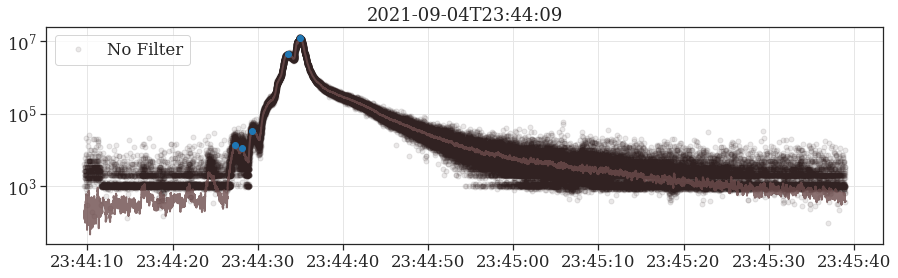

In [25]:
pmtspec, timestamp = pmt_specs[0], selected_timestamps[0]

pmtspec.pmt_meta_data.add_colors(
    plt.cm.get_cmap("viridis"), None, sns.color_palette("dark:red", as_cmap=True)
)

times_ns = strawb.tools.asdatetime(pmtspec.trb_rates.time, "ns")
timemask = times_ns >= timestamp + np.timedelta64(0, "s")
timemask &= times_ns <= timestamp + np.timedelta64(90, "s")
masked_times_ns = times_ns[timemask]

plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array[
    pmtspec.pmt_meta_data.channel_meta_array["wavelength"] == 0
]:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
    smoothed_rate = uniform_filter1d(
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]], size=filter_N
    )
    plt.plot(
        masked_times_ns,
        smoothed_rate,
        color=change_color_ld(wavelength_to_rgb(ch, gamma=0.4), +0.2),
        lw=2,
        alpha=0.8,
    )
    peaks, prop = find_peaks(
        smoothed_rate,
        height=1e4,
        width=filter_N,
        distance=filter_N,
        rel_height=0.3
        # prominence=8E3
    )
    plt.plot(masked_times_ns[peaks], smoothed_rate[peaks], marker="o", lw=0, color="tab:blue")
plt.legend(loc=2, ncol=2)
plt.semilogy()


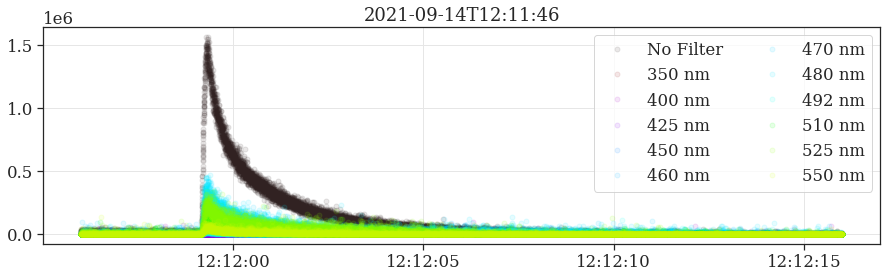

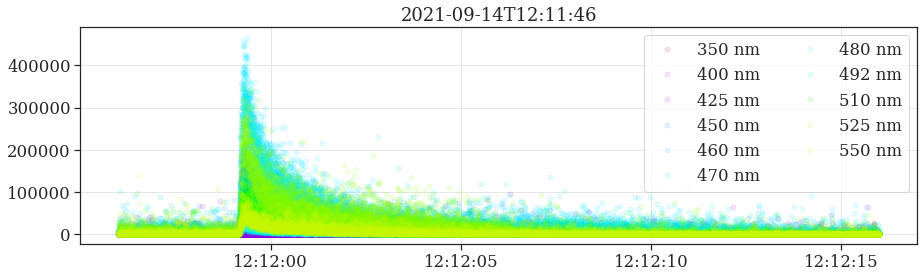

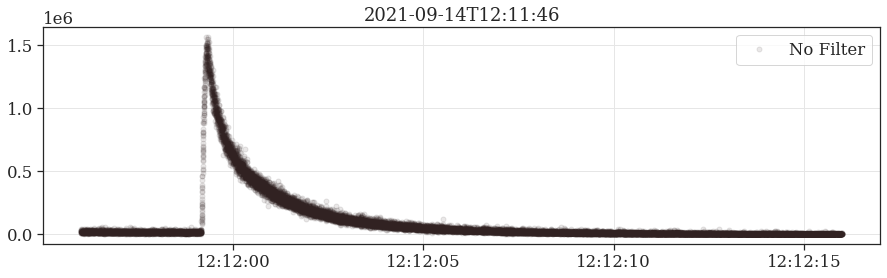

In [26]:
pmtspec, timestamp = pmt_specs[1], selected_timestamps[1]

pmtspec.pmt_meta_data.add_colors(
    plt.cm.get_cmap("viridis"), None, sns.color_palette("dark:red", as_cmap=True)
)

times_ns = strawb.tools.asdatetime(pmtspec.trb_rates.time, "ns")
### select +-2min around biolumi events
timemask = times_ns >= timestamp + np.timedelta64(10, "s")
timemask &= times_ns <= timestamp + np.timedelta64(30, "s")
masked_times_ns = times_ns[timemask]

plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
plt.legend(loc=1, ncol=2)


plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array[
    pmtspec.pmt_meta_data.channel_meta_array["wavelength"] != 0
]:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
plt.legend(loc=1, ncol=2)


plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array[
    pmtspec.pmt_meta_data.channel_meta_array["wavelength"] == 0
]:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
plt.legend(loc=1, ncol=2)


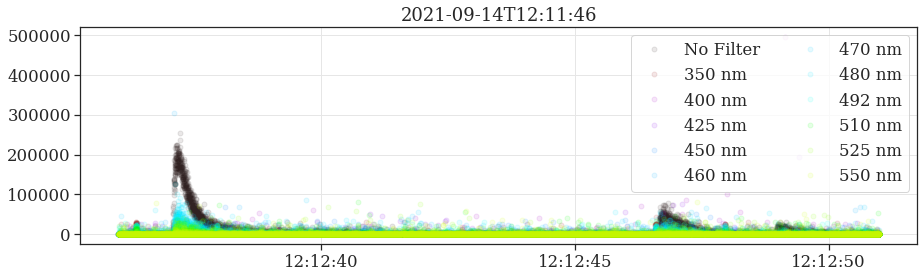

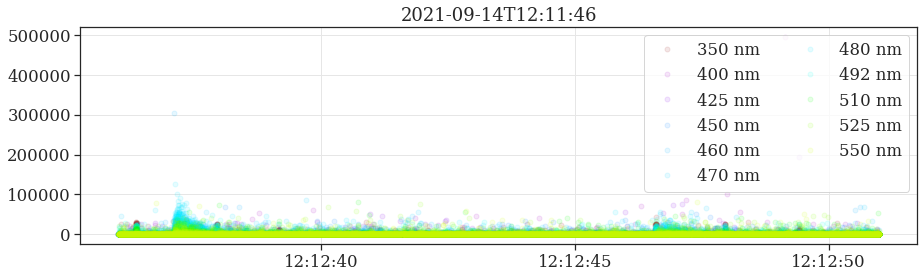

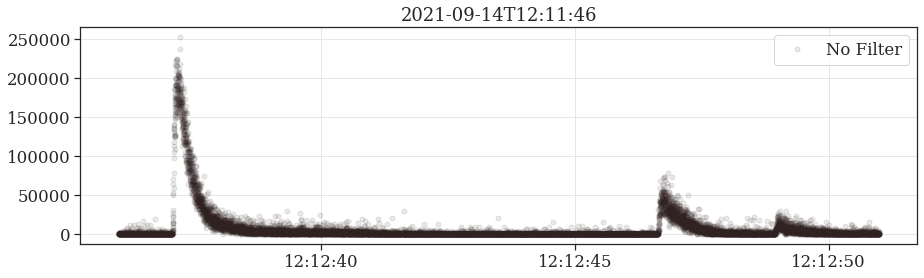

In [27]:
pmtspec, timestamp = pmt_specs[1], selected_timestamps[1]

pmtspec.pmt_meta_data.add_colors(
    plt.cm.get_cmap("viridis"), None, sns.color_palette("dark:red", as_cmap=True)
)

times_ns = strawb.tools.asdatetime(pmtspec.trb_rates.time, "ns")
### select +-2min around biolumi events
timemask = times_ns >= timestamp + np.timedelta64(50, "s")
timemask &= times_ns <= timestamp + np.timedelta64(65, "s")
masked_times_ns = times_ns[timemask]

plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
plt.legend(loc=1, ncol=2)


plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array[
    pmtspec.pmt_meta_data.channel_meta_array["wavelength"] != 0
]:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
plt.legend(loc=1, ncol=2)


plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array[
    pmtspec.pmt_meta_data.channel_meta_array["wavelength"] == 0
]:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
plt.legend(loc=1, ncol=2)


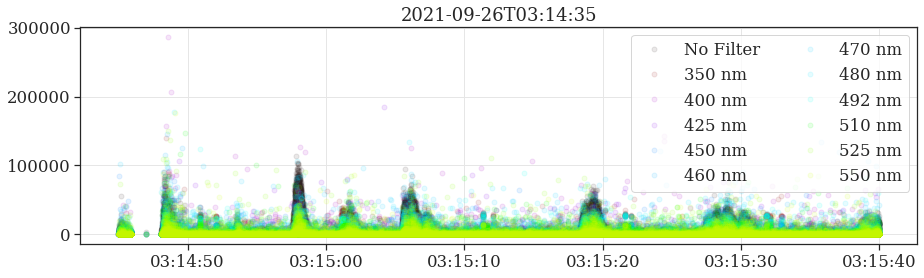

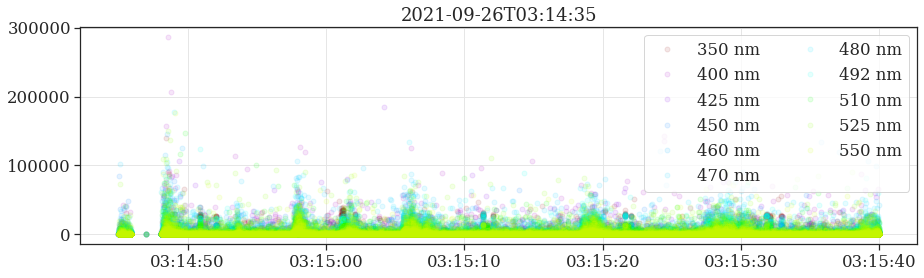

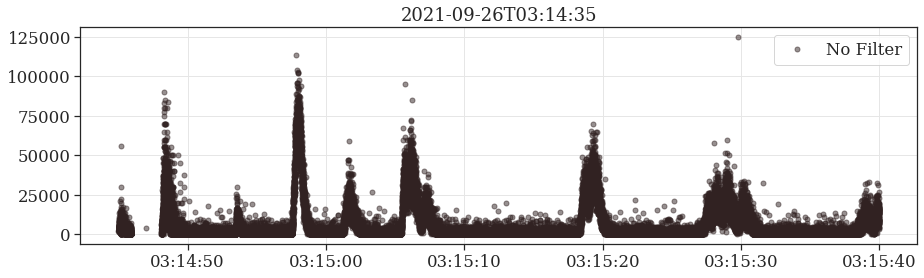

In [28]:
pmtspec, timestamp = pmt_specs[2], selected_timestamps[2]

pmtspec.pmt_meta_data.add_colors(
    plt.cm.get_cmap("viridis"), None, sns.color_palette("dark:red", as_cmap=True)
)

times_ns = strawb.tools.asdatetime(pmtspec.trb_rates.time, "ns")
### select +-2min around biolumi events
timemask = times_ns >= timestamp + np.timedelta64(10, "s")
timemask &= times_ns <= timestamp + np.timedelta64(65, "s")
masked_times_ns = times_ns[timemask]

plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
plt.legend(loc=1, ncol=2)


plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array[
    pmtspec.pmt_meta_data.channel_meta_array["wavelength"] != 0
]:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.1,
        ms=5,
    )
plt.legend(loc=1, ncol=2)


plt.figure(figsize=(15, 4))
plt.title(timestamp)
for ch in pmtspec.pmt_meta_data.channel_meta_array[
    pmtspec.pmt_meta_data.channel_meta_array["wavelength"] == 0
]:
    _ = plt.plot(
        masked_times_ns,
        pmtspec.trb_rates.rate.T[timemask][:, ch["index"]],
        color=wavelength_to_rgb(ch, gamma=0.4),
        label=ch["label"],
        marker="o",
        lw=0,
        alpha=0.5,
        ms=5,
    )
plt.legend(loc=1, ncol=2)
